In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')


import statsmodels.api as sm
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,\
confusion_matrix,cohen_kappa_score,roc_auc_score,roc_curve

In [2]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
print('No.of.rows:',df.shape[0])
print()
print('No.of.columns:',df.shape[1])
print()
print('Number columns:',df.select_dtypes(np.number).columns.values)
print()
print('Categroical columns:',df.select_dtypes('object').columns.values)

No.of.rows: 7043

No.of.columns: 21

Number columns: ['SeniorCitizen' 'tenure' 'MonthlyCharges']

Categroical columns: ['customerID' 'gender' 'Partner' 'Dependents' 'PhoneService'
 'MultipleLines' 'InternetService' 'OnlineSecurity' 'OnlineBackup'
 'DeviceProtection' 'TechSupport' 'StreamingTV' 'StreamingMovies'
 'Contract' 'PaperlessBilling' 'PaymentMethod' 'TotalCharges' 'Churn']


In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [32]:
df['SeniorCitizen']=df['SeniorCitizen'].astype('object')

In [11]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [12]:
df.describe(include='object').T


,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [13]:
df.shape

(7043, 21)

Data preprocessing

In [14]:
#missing values

df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
#Tenure = 0, missing values
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [17]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)

In [18]:
# checks if the 'tenure' is equal to 0 and the 'Contract' is 'Two year' for each row.
#If both conditions are met,
#it replaces the 'tenure' value with the mean 'tenure' of customers with a two-year contract.
# Otherwise, it keeps the original 'tenure' value.

df['tenure']=np.where((df['tenure']==0) & (df['Contract']=='Two year'),df[df['Contract']=='Two year']['tenure'].mean(),df['tenure'])

In [20]:
# same with the contract = one year also has been done

df['tenure']=np.where((df['tenure']==0) & (df['Contract']=='One year'),df[df['Contract']=='One year']['tenure'].mean(),df['tenure'])

In [21]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

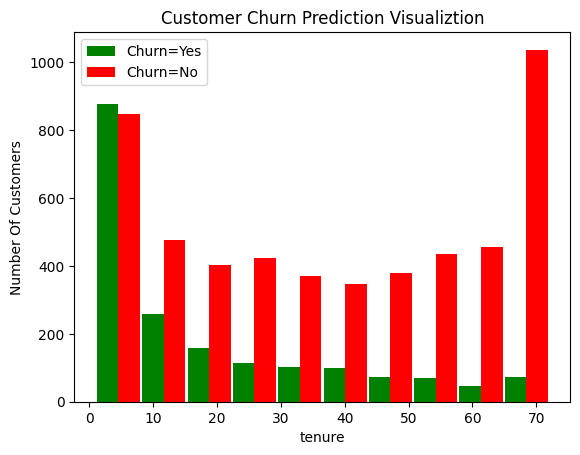

In [25]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

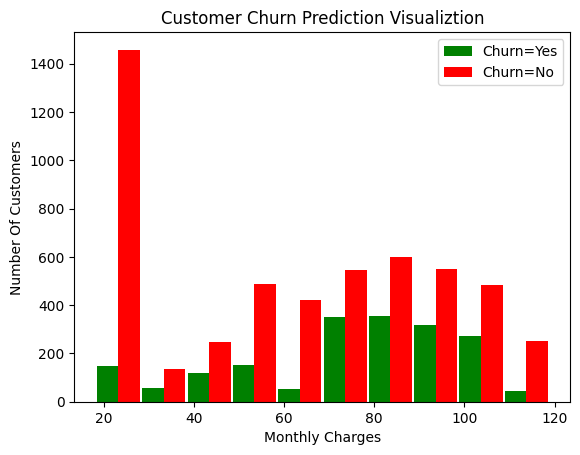

In [26]:
mc_churn_no = df[df.Churn=='No'].MonthlyCharges
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [27]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


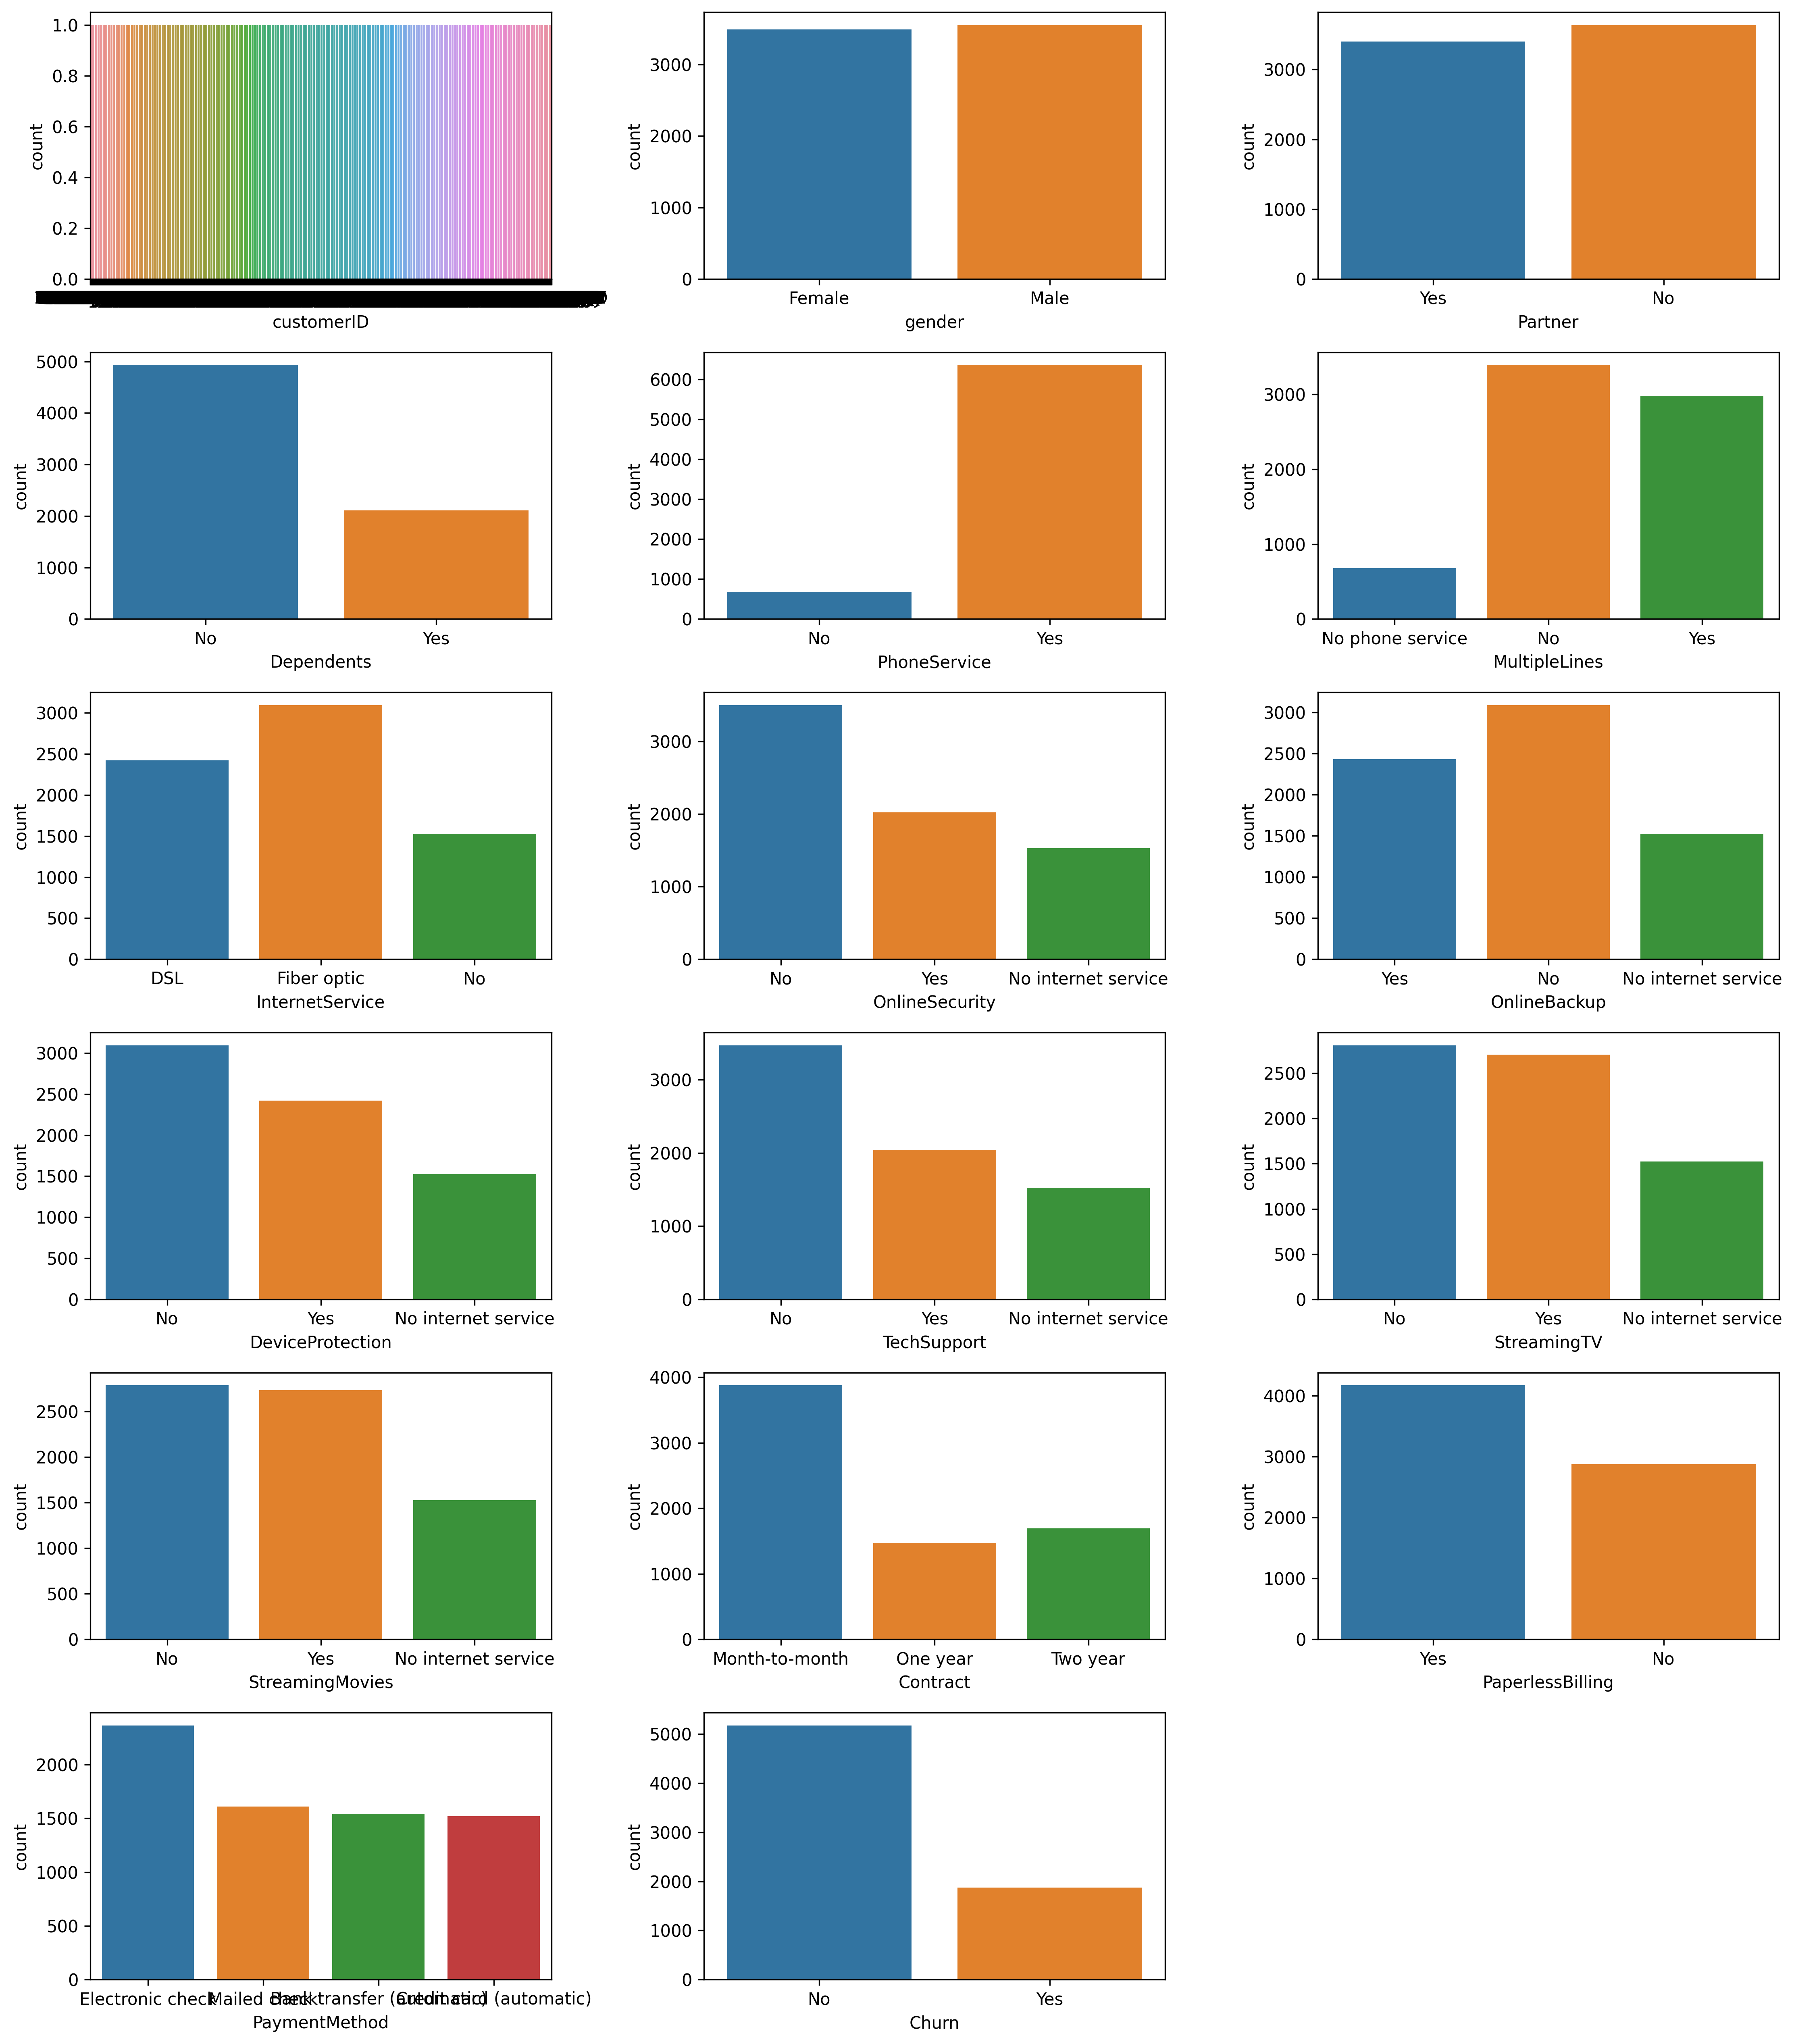

In [30]:
plt.figure(figsize=(15,17),dpi=300)
t=1
for i in df.select_dtypes(include='object').columns:
    plt.subplot(6,3,t)
    sns.countplot(data=df,x=i)
    t=t+1
plt.tight_layout()
plt.show()


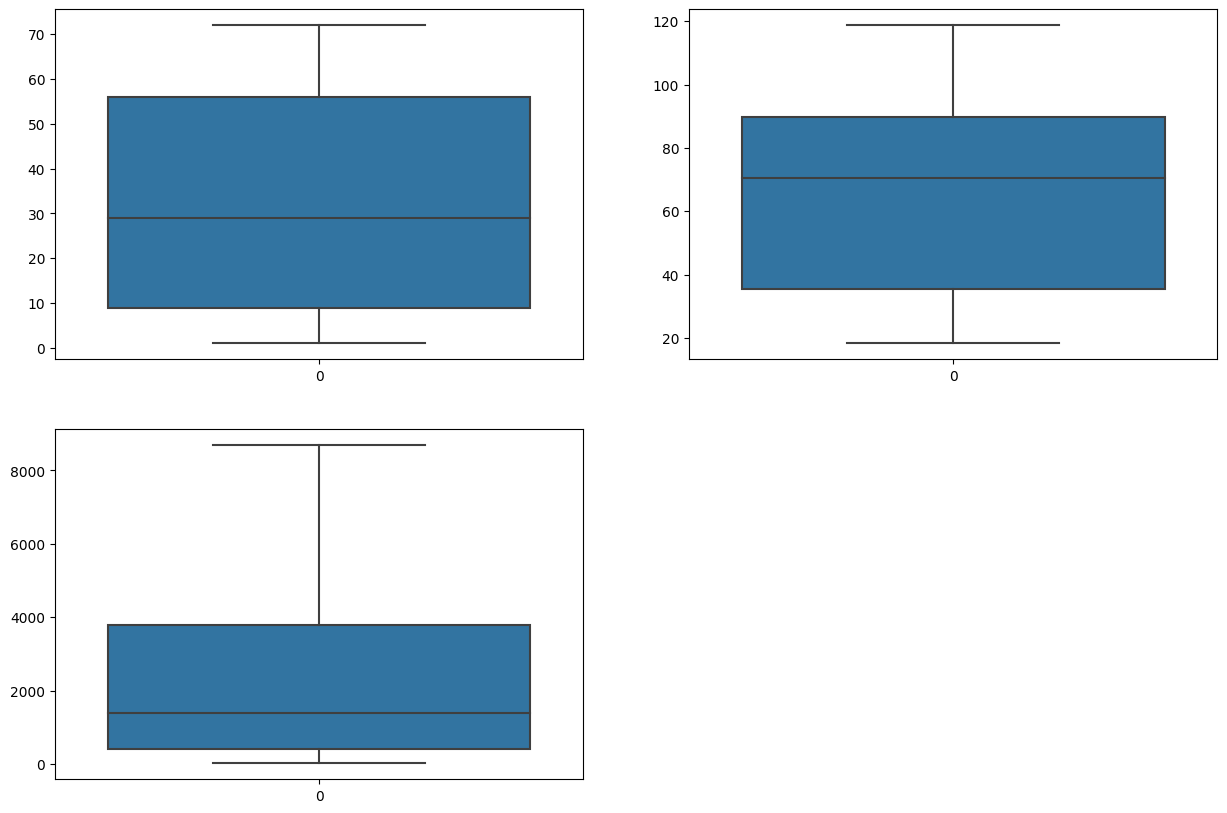

In [33]:
#There are no outliers in the data
plt.figure(figsize=(15,10))
t=1
for i in df.select_dtypes(include=np.number).columns:
    plt.subplot(2,2,t)
    sns.boxplot(df[i])
    t=t+1
plt.show()

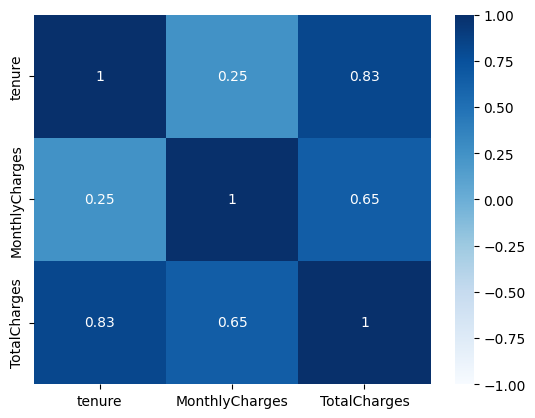

In [34]:
sns.heatmap(df.select_dtypes(include=np.number).corr(),vmax=1,vmin=-1,cmap='Blues',annot=True)
plt.show()

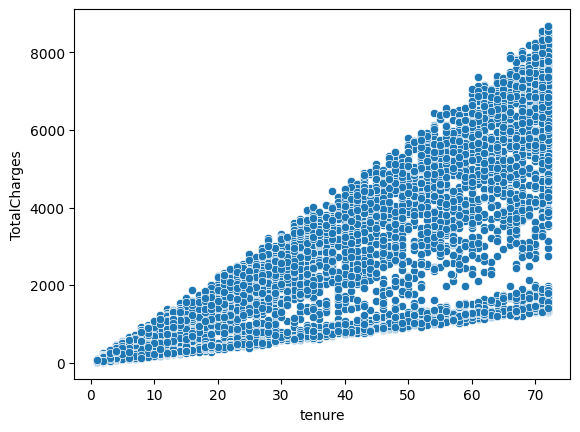

In [38]:
sns.scatterplot(x='tenure',y='TotalCharges',data=df)
plt.show()

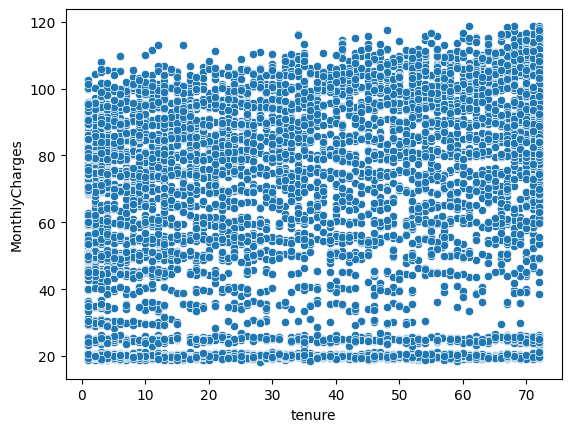

In [37]:
sns.scatterplot(x='tenure',y='MonthlyCharges',data=df)
plt.show()

In [39]:
df.drop(columns=['customerID'],inplace=True)


<ipython-input-40-9124e87be96f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-40-9124e87be96f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-40-9124e87be96f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.

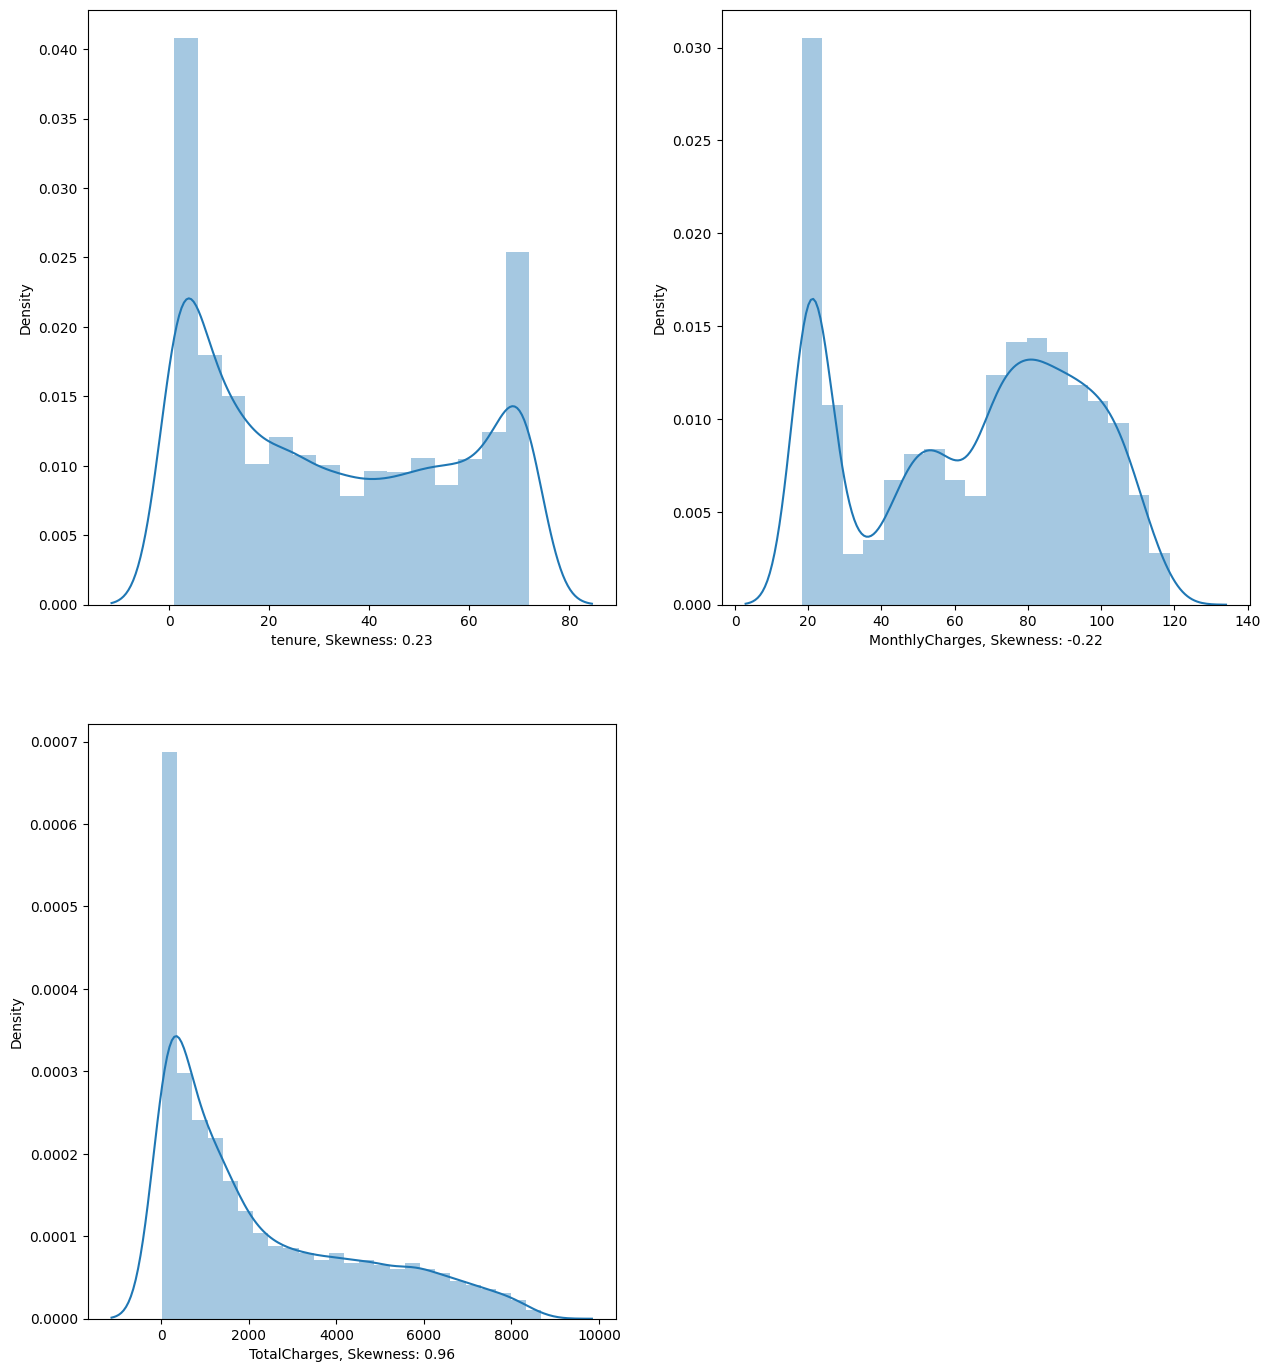

In [40]:
## skewness checking
plt.figure(figsize=(15,17))
t=1
for i in df.select_dtypes(include=np.number).columns:
    plt.subplot(2,2,t)
    sns.distplot(df[i])
    plt.xlabel('%s, Skewness: %.2f'%(i,df[i].skew()))
    t=t+1
plt.show()

In [49]:
num_cols=df.select_dtypes(include=np.number).columns
cat_cols=df.select_dtypes(include='object').columns

num_cols


Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

<Axes: ylabel='Churn'>

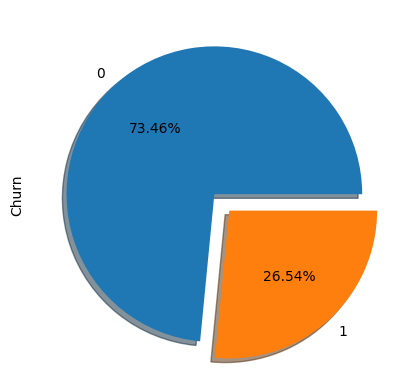

In [43]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})
df['Churn'].value_counts().plot(kind='pie',autopct='%.2f%%',explode={0,0.15},shadow=True)

In [44]:
df.groupby(by='gender')['Churn'].mean().to_frame()

,Churn
gender,
Female,0.269209
Male,0.261603


In [47]:
df.groupby(by='Partner')['Churn'].mean().to_frame()

,Churn
Partner,
No,0.329580
Yes,0.196649


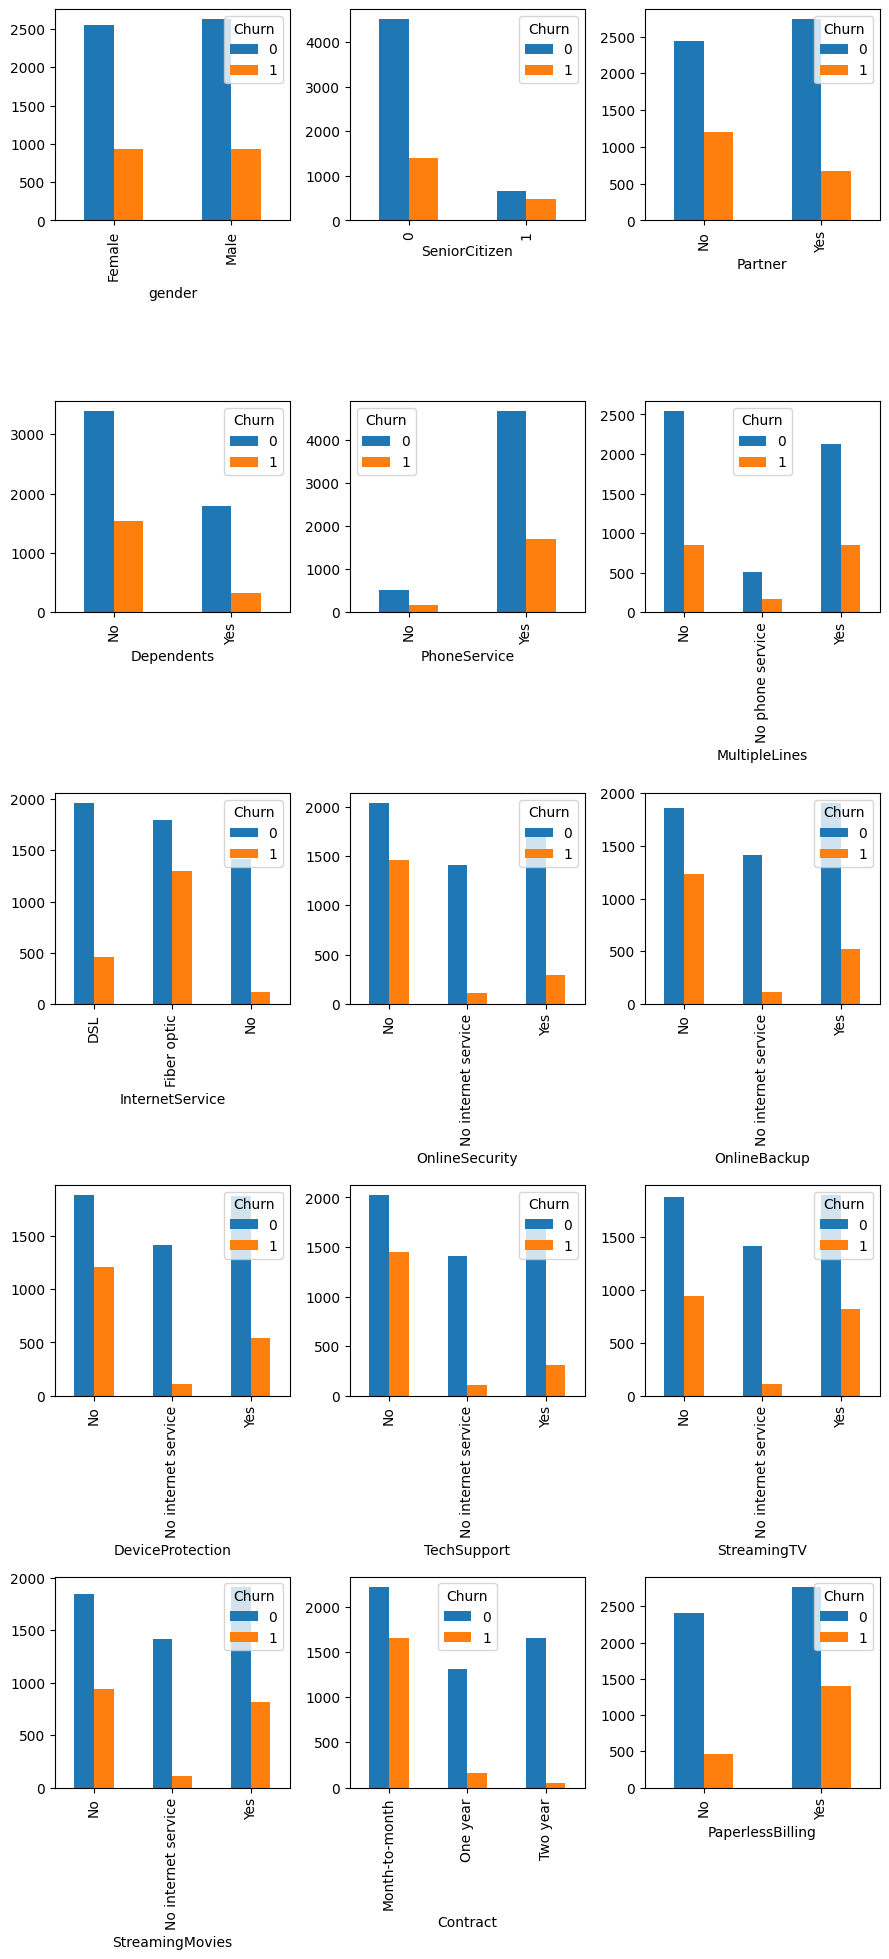

In [48]:
## Analysing which feature for each category is likely to Churn
plt.figure(figsize=(9,22))
t=1
for i in cat_cols[:-1]:
    plt.subplot(6,3,t)
    pd.crosstab(df[i],df['Churn']).plot(kind='bar',ax=plt.gca())
    t+=1
plt.tight_layout()
plt.show()

In [50]:
for i in cat_cols:
    print(i)
    print(df[i].value_counts()*100/len(df),end='\n*******************\n')

gender
Male      50.47565
Female    49.52435
Name: gender, dtype: float64
*******************
SeniorCitizen
0    83.785319
1    16.214681
Name: SeniorCitizen, dtype: float64
*******************
Partner
No     51.69672
Yes    48.30328
Name: Partner, dtype: float64
*******************
Dependents
No     70.041176
Yes    29.958824
Name: Dependents, dtype: float64
*******************
PhoneService
Yes    90.316626
No      9.683374
Name: PhoneService, dtype: float64
*******************
MultipleLines
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: MultipleLines, dtype: float64
*******************
InternetService
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: InternetService, dtype: float64
*******************
OnlineSecurity
No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: OnlineSecurity, dtype: float64
*******************
OnlineBackup
No                     

In [51]:
enc=['Partner','Dependents','PhoneService','PaperlessBilling']


In [52]:
## encoding
for i in enc:
    df[i]=df[i].map({'No':0,'Yes':1})

In [53]:
df['gender']=df['gender'].map({'Female':0,'Male':1})


In [55]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [56]:
# checking the unique values for each columns
print_unique_col_values(df)

MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [57]:
yes_no_columns = ['MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [61]:
## One hot encoding for categorical columns

df1 = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [59]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1.0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34.0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2.0,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45.0,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2.0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [63]:
df1.dtypes


gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [111]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   float64
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

In [64]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler

In [68]:
X=df1.drop(columns='Churn')
y=df1['Churn']
X=sm.add_constant(X)

sc=MinMaxScaler()
X=sc.fit_transform(X) ## feature scaling
X=pd.DataFrame(X)

In [73]:
y.shape,X.shape

((7043,), (7043, 27))

In [77]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7043 non-null   float64
 1   1       7043 non-null   float64
 2   2       7043 non-null   float64
 3   3       7043 non-null   float64
 4   4       7043 non-null   float64
 5   5       7043 non-null   float64
 6   6       7043 non-null   float64
 7   7       7043 non-null   float64
 8   8       7043 non-null   float64
 9   9       7043 non-null   float64
 10  10      7043 non-null   float64
 11  11      7043 non-null   float64
 12  12      7043 non-null   float64
 13  13      7043 non-null   float64
 14  14      7043 non-null   float64
 15  15      7043 non-null   float64
 16  16      7043 non-null   float64
 17  17      7043 non-null   float64
 18  18      7043 non-null   float64
 19  19      7043 non-null   float64
 20  20      7043 non-null   float64
 21  21      7043 non-null   float64
 22  

In [78]:
## test_train_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=42)

## RandomOverSampling for dealing with class imbalancing
rs = RandomOverSampler(random_state=42)
X_resampled, y_resampled = rs.fit_resample(X_train, y_train)

In [79]:
X_resampled.shape


(7244, 27)

In [80]:
def validation(test,pred):
    print('Confusion Matrix\n',confusion_matrix(test,pred))
    print('Accuracy:',accuracy_score(test,pred))
    print('Precison:',precision_score(test,pred))
    print('Recall:',recall_score(test,pred))
    print('F1 Score:',f1_score(test,pred))
    print('Cohen kappa Score:',cohen_kappa_score(test,pred))
    print('Classification Report\n',classification_report(test,pred))

In [81]:
def roc_curv(test,pred):
    fpr,tpr,thres=roc_curve(test,pred)
    print('AUC:',roc_auc_score(test,pred))
    plt.plot(fpr,tpr,color='red')
    plt.plot([0, 1], [0, 1],'b--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC CURVE')

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

KNN

In [83]:
def model_results(model,x_train,y_train,x_test,y_test):
    print(str(model))

    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    validation(y_test,y_pred)

    y_pred_prob = model.predict_proba(x_test)[:,1]

    roc_curv(y_test,y_pred_prob)

KNeighborsClassifier(n_neighbors=3)
Confusion Matrix
 [[1287  265]
 [ 258  303]]
Accuracy: 0.7524846190250828
Precison: 0.5334507042253521
Recall: 0.5401069518716578
F1 Score: 0.5367581930912312
Cohen kappa Score: 0.36789394839845535
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1552
           1       0.53      0.54      0.54       561

    accuracy                           0.75      2113
   macro avg       0.68      0.68      0.68      2113
weighted avg       0.75      0.75      0.75      2113

AUC: 0.7502365988569749


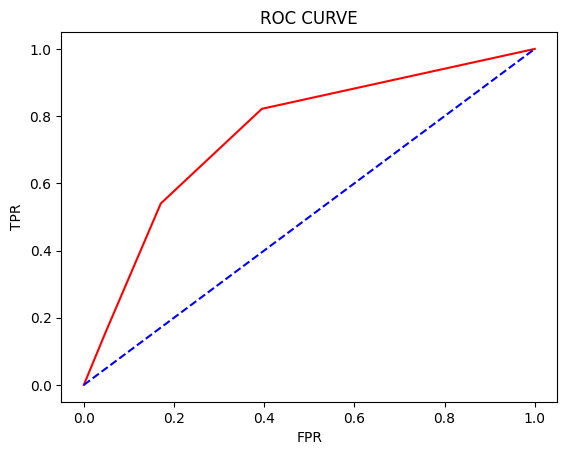

In [84]:
model_results(KNeighborsClassifier(n_neighbors=3),X_train,y_train,X_test,y_test)

Decision Tree

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2)
Confusion Matrix
 [[1344  208]
 [ 264  297]]
Accuracy: 0.7766209181258874
Precison: 0.5881188118811881
Recall: 0.5294117647058824
F1 Score: 0.5572232645403377
Cohen kappa Score: 0.40840692636584086
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      1552
           1       0.59      0.53      0.56       561

    accuracy                           0.78      2113
   macro avg       0.71      0.70      0.70      2113
weighted avg       0.77      0.78      0.77      2113

AUC: 0.7810168467574471


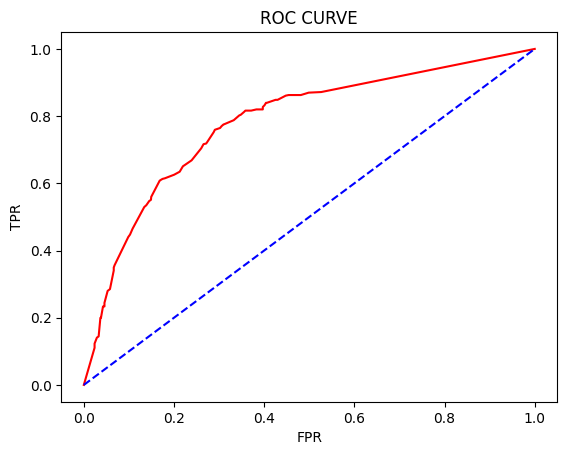

In [85]:
model_results(DecisionTreeClassifier(criterion='entropy',max_depth=9, min_samples_leaf=2),X_train,y_train,X_test,y_test)

RandomForest

RandomForestClassifier(max_depth=5, n_estimators=500)
Confusion Matrix
 [[1443  109]
 [ 326  235]]
Accuracy: 0.7941315664931378
Precison: 0.6831395348837209
Recall: 0.41889483065953653
F1 Score: 0.5193370165745856
Cohen kappa Score: 0.3977875865575311
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      1552
           1       0.68      0.42      0.52       561

    accuracy                           0.79      2113
   macro avg       0.75      0.67      0.69      2113
weighted avg       0.78      0.79      0.78      2113

AUC: 0.8448600621129426


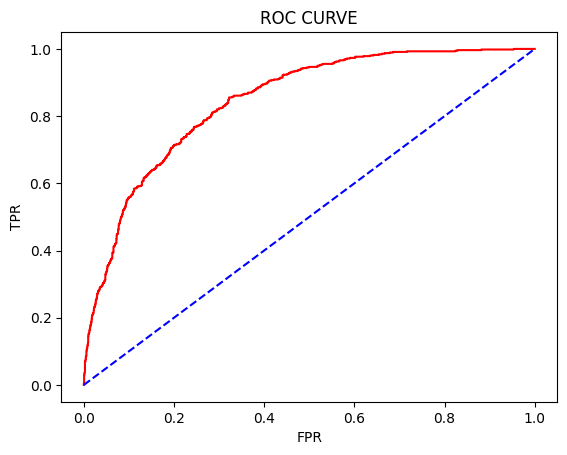

In [86]:
model_results(RandomForestClassifier(n_estimators=500,max_depth=5),X_train,y_train,X_test,y_test)

GradientBoosting

```

```



GradientBoostingClassifier(n_estimators=400)
Confusion Matrix
 [[1387  165]
 [ 284  277]]
Accuracy: 0.7875059157595835
Precison: 0.6266968325791855
Recall: 0.49376114081996436
F1 Score: 0.5523429710867398
Cohen kappa Score: 0.4155918234092947
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.63      0.49      0.55       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113

AUC: 0.8269520554238565


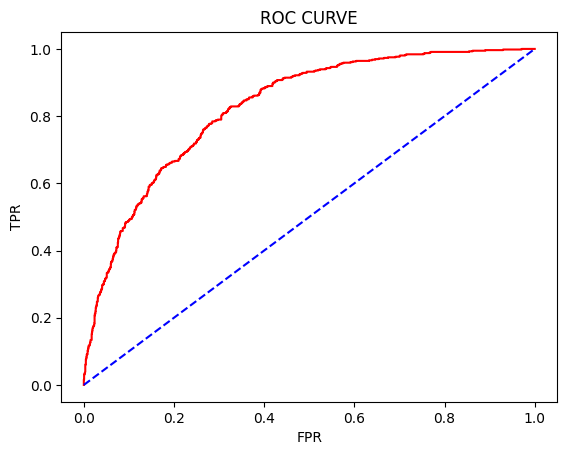

In [87]:
model_results(GradientBoostingClassifier(n_estimators=400,learning_rate=0.1),X_train,y_train,X_test,y_test)

In [90]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
feature_importances = model.feature_importances_
feature_importances

array([0.        , 0.02794307, 0.02006233, 0.02329178, 0.01905275,
       0.16259658, 0.00649898, 0.02058502, 0.02223313, 0.02100004,
       0.01945344, 0.0211382 , 0.01703153, 0.01814715, 0.02661597,
       0.16611048, 0.17810217, 0.00979541, 0.03726257, 0.0135145 ,
       0.06650348, 0.01002346, 0.02134333, 0.01171877, 0.01198644,
       0.03736294, 0.01062649])

Hyper Parameter Tuning

In [94]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10)}]
dt=DecisionTreeClassifier(random_state = 42)
tree_grid = GridSearchCV(estimator = dt, param_grid = tuned_paramaters, cv = 5)
dt_model_tuned = tree_grid.fit(X_train, y_train)
print('Best parameters for decision tree classifier: ', dt_model_tuned.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 2} 



DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=7)
Confusion Matrix
 [[1393  159]
 [ 302  259]]
Accuracy: 0.7818267865593942
Precison: 0.6196172248803827
Recall: 0.46167557932263814
F1 Score: 0.5291113381001021
Cohen kappa Score: 0.3910514362374823
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1552
           1       0.62      0.46      0.53       561

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113

AUC: 0.8072419923920834


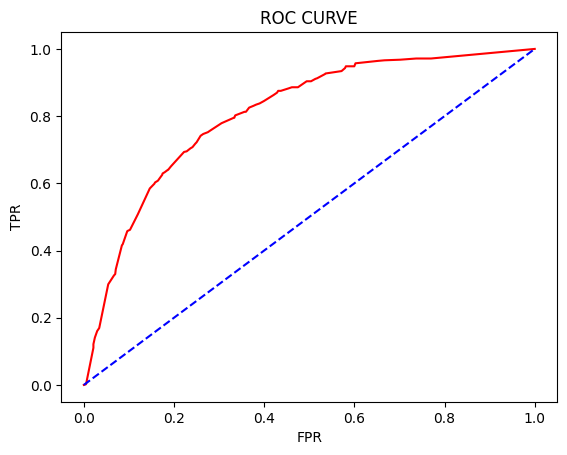

In [99]:
model_results(DecisionTreeClassifier(criterion='gini',max_depth=8,max_features='sqrt', min_samples_leaf=7,min_samples_split=2),X_train,y_train,X_test,y_test)

In [97]:
tuned_paramaters = {'n_estimators': [100, 200, 300,400,500],'learning_rate': [0.1, 0.05, 0.01]}
gb=GradientBoostingClassifier(random_state = 42)
tree_grid = GridSearchCV(estimator=gb, param_grid=tuned_paramaters, cv = 5)
gb_model_tuned = tree_grid.fit(X_train, y_train)
print('Best parameters for gradient boosting classifier: ',gb_model_tuned.best_params_, '\n')


Best parameters for gradient boosting classifier:  {'learning_rate': 0.01, 'n_estimators': 300} 



GradientBoostingClassifier(n_estimators=300)
Confusion Matrix
 [[1390  162]
 [ 280  281]]
Accuracy: 0.7908187411263606
Precison: 0.6343115124153499
Recall: 0.5008912655971479
F1 Score: 0.5597609561752988
Cohen kappa Score: 0.42505383506340155
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1552
           1       0.63      0.50      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113

AUC: 0.8308398570299722


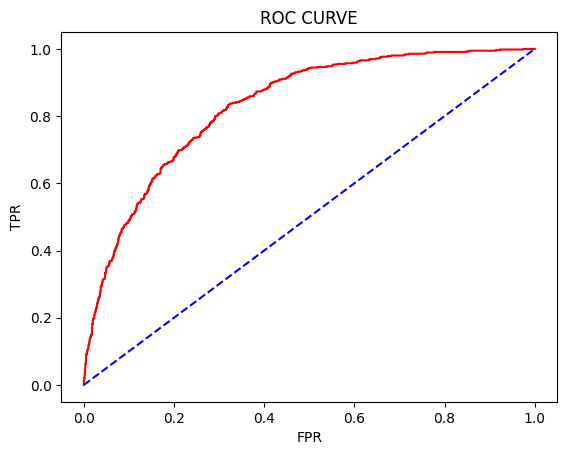

In [98]:
model_results(GradientBoostingClassifier(n_estimators=300,learning_rate=0.1),X_train,y_train,X_test,y_test)

In [100]:
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'criterion': ['entropy', 'gini'],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)


Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, random_state=42)
Confusion Matrix
 [[1400  152]
 [ 279  282]]
Accuracy: 0.7960246095598675
Precison: 0.6497695852534562
Recall: 0.5026737967914439
F1 Score: 0.5668341708542713
Cohen kappa Score: 0.4362672061118412
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1552
           1       0.65      0.50      0.57       561

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.78      0.80      0.79      2113

AUC: 0.8419720629582668


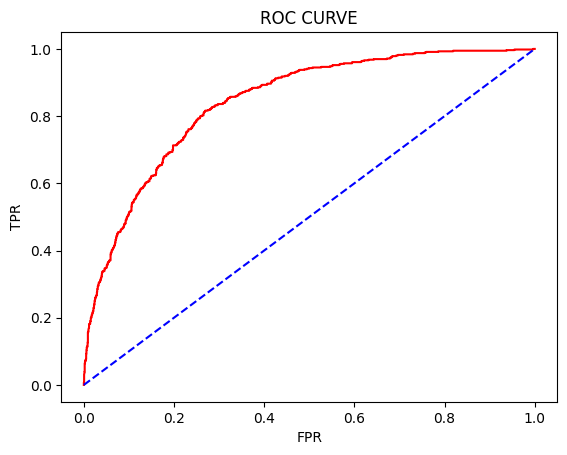

In [101]:
best_rf_model = RandomForestClassifier(random_state=42, **best_params)

# Train the model on the training data
best_rf_model.fit(X_train, y_train)

# Evaluate the model on the test data using your custom function (model_results)
model_results(best_rf_model, X_train, y_train, X_test, y_test)

Gradient Boosting and Random Forest works best after tuning.Both are giving same accuracy: 79%

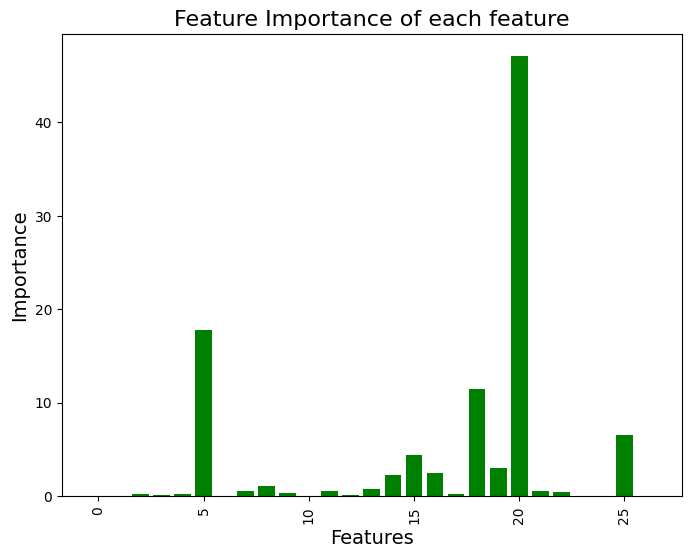

In [106]:
plt.figure(figsize=(8,6))
gb=GradientBoostingClassifier(n_estimators=300,learning_rate=0.01)
gb.fit(X_train,y_train)

feature_importances = gb.feature_importances_
feature_names = X.columns

# Create a bar plot with feature names on the X-axis
plt.bar(feature_names, feature_importances * 100, color='green')

# Customize plot labels and rotation for better readability
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=90)
plt.title('Feature Importance of each feature', fontsize=16)

plt.show()


Contract and Phone-Service are two most important features

In [115]:
# Identify the top 5 most important features
top_features_indices = gb.feature_importances_.argsort()[::-1][:10]
top_features = X_train.columns[top_features_indices]

# Create a new dataset with only the top 5 features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Initialize and train the Gradient Boosting Classifier
gb_top = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01, random_state=42)
gb_top.fit(X_train_top, y_train)

# Evaluate the model on the testing set
y_pred_top = gb_top.predict(X_test_top)

# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_top)
conf_matrix = confusion_matrix(y_test, y_pred_top)
class_report = classification_report(y_test, y_pred_top)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.79649787032655

Confusion Matrix:
 [[1422  130]
 [ 300  261]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1552
           1       0.67      0.47      0.55       561

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.80      0.78      2113



Result
Gradient Boosting (learning rate = 0.01, n_estimators = 300) works even better with top 10 most important features with f1 score 87%

Build an ANN network

In [117]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1.         34.          2.         45.          8.         22.
 10.         28.         62.         13.         16.         58.
 49.         25.         69.         52.         71.         21.
 12.         30.         47.         72.         17.         27.
  5.         46.         11.         70.         63.         43.
 15.         60.         18.         66.          9.          3.
 31.         50.         64.         56.          7.         42.
 35.         48.         29.         65.         38.         68.
 32.         55.         37.         36.         41.          6.
  4.         33.         67.         23.         57.         61.
 14.         20.         53.         40.         59.         24.
 44.         19.         54.         51.         26.         56.73510324
 39.         42.04480652]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
Tec

In [118]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [119]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.78500145
 0.53521127 0.57809587]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtectio

In [120]:
X = df1.drop('Churn',axis='columns')
y = df1['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [121]:
X_train.shape

(5634, 26)

In [122]:
y_train.shape

(5634,)

In [123]:
X_test.shape


(1409, 26)

In [124]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
177/177 [==============================] - 1s 2ms/step - loss: 0.5205 - accuracy: 0.7322
Epoch 2/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.7945
Epoch 3/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4215 - accuracy: 0.8051
Epoch 4/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8062
Epoch 5/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4147 - accuracy: 0.8069
Epoch 6/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8076
Epoch 7/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8076
Epoch 8/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.8083
Epoch 9/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8090
Epoch 10/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4071 - accura

In [125]:
model.evaluate(X_test, y_test)


45/45 [==============================] - 0s 3ms/step - loss: 0.4757 - accuracy: 0.7871


[0.4756983816623688, 0.7870830297470093]

In [128]:
yp = model.predict(X_test)


45/45 [==============================] - 0s 3ms/step


In [129]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [130]:
y_pred[:10]


[0, 0, 0, 1, 0, 1, 0, 1, 0, 0]

In [131]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1023
           1       0.66      0.46      0.54       386

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.77      0.79      0.77      1409

